# Predict Podcast Listening Time

## Overview

- **Goal**: Predict the listening time of podcast episodes
- **Evaluation Metric**: Root Mean Squared Error (RMSE)
- **Submission Format**: CSV file with predictions for each podcast ID

### Submission File Format
```csv
id,Listening_Time_minutes
750000,45.437
750001,45.437
750002,45.437
```

# Dataset Description

The dataset for this competition (both train and test) was generated from a deep learning model trained on the Podcast Listening Time Prediction dataset. Feature distributions are close to, but not exactly the same, as the original. Feel free to use the original dataset as part of this competition, both to explore differences as well as to see whether incorporating the original in training improves model performance.

## Files

- **train.csv** - the training dataset; Listening_Time_minutes is the target
- **test.csv** - the test dataset; your objective is to predict the Listening_Time_minutes for each row
- **sample_submission.csv** - a sample submission file in the correct format.

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Set up visualization settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [5]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

sample_submission.head()

,id,Listening_Time_minutes
0,750000,45.437
1,750001,45.437
2,750002,45.437
3,750003,45.437
4,750004,45.437


# Basic data exploration steps



In [10]:
# Get basic information about the dataset
print("Training set shape:", train.shape)
print("\nBasic information about the training set:")

train.info()


Training set shape: (750000, 12)

Basic information about the training set:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 12 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           750000 non-null  int64  
 1   Podcast_Name                 750000 non-null  object 
 2   Episode_Title                750000 non-null  object 
 3   Episode_Length_minutes       662907 non-null  float64
 4   Genre                        750000 non-null  object 
 5   Host_Popularity_percentage   750000 non-null  float64
 6   Publication_Day              750000 non-null  object 
 7   Publication_Time             750000 non-null  object 
 8   Guest_Popularity_percentage  603970 non-null  float64
 9   Number_of_Ads                749999 non-null  float64
 10  Episode_Sentiment            750000 non-null  object 
 11  Listening_Time_minutes       750000 non-n

In [14]:

# Display first few rows
print("\nFirst few rows of the training set:")
train.head()


First few rows of the training set:


,id,Podcast_Name,Episode_Title,Episode_Length_minutes,Genre,Host_Popularity_percentage,Publication_Day,Publication_Time,Guest_Popularity_percentage,Number_of_Ads,Episode_Sentiment,Listening_Time_minutes
0,0,Mystery Matters,Episode 98,NaN,True Crime,74.81,Thursday,Night,NaN,0.0,Positive,31.41998
1,1,Joke Junction,Episode 26,119.80,Comedy,66.95,Saturday,Afternoon,75.95,2.0,Negative,88.01241
2,2,Study Sessions,Episode 16,73.90,Education,69.97,Tuesday,Evening,8.97,0.0,Negative,44.92531
3,3,Digital Digest,Episode 45,67.17,Technology,57.22,Monday,Morning,78.70,2.0,Positive,46.27824
4,4,Mind & Body,Episode 86,110.51,Health,80.07,Monday,Afternoon,58.68,3.0,Neutral,75.61031


In [12]:

# Basic statistical summary
print("\nStatistical summary of the training set:")
train.describe()



Statistical summary of the training set:


,id,Episode_Length_minutes,Host_Popularity_percentage,Guest_Popularity_percentage,Number_of_Ads,Listening_Time_minutes
count,750000.000000,662907.000000,750000.000000,603970.000000,749999.000000,750000.000000
mean,374999.500000,64.504738,59.859901,52.236449,1.348855,45.437406
std,216506.495284,32.969603,22.873098,28.451241,1.151130,27.138306
min,0.000000,0.000000,1.300000,0.000000,0.000000,0.000000
25%,187499.750000,35.730000,39.410000,28.380000,0.000000,23.178350
50%,374999.500000,63.840000,60.050000,53.580000,1.000000,43.379460
75%,562499.250000,94.070000,79.530000,76.600000,2.000000,64.811580
max,749999.000000,325.240000,119.460000,119.910000,103.910000,119.970000


In [13]:

# Check for missing values
print("\nMissing values in training set:")
train.isnull().sum()


Missing values in training set:


id                                  0
Podcast_Name                        0
Episode_Title                       0
Episode_Length_minutes          87093
Genre                               0
Host_Popularity_percentage          0
Publication_Day                     0
Publication_Time                    0
Guest_Popularity_percentage    146030
Number_of_Ads                       1
Episode_Sentiment                   0
Listening_Time_minutes              0
dtype: int64

# Analyze the target variable

C:\Users\ricar\AppData\Local\Temp\ipykernel_14760\58906615.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(train['Listening_Time_minutes'], shade=True, ax=ax2)


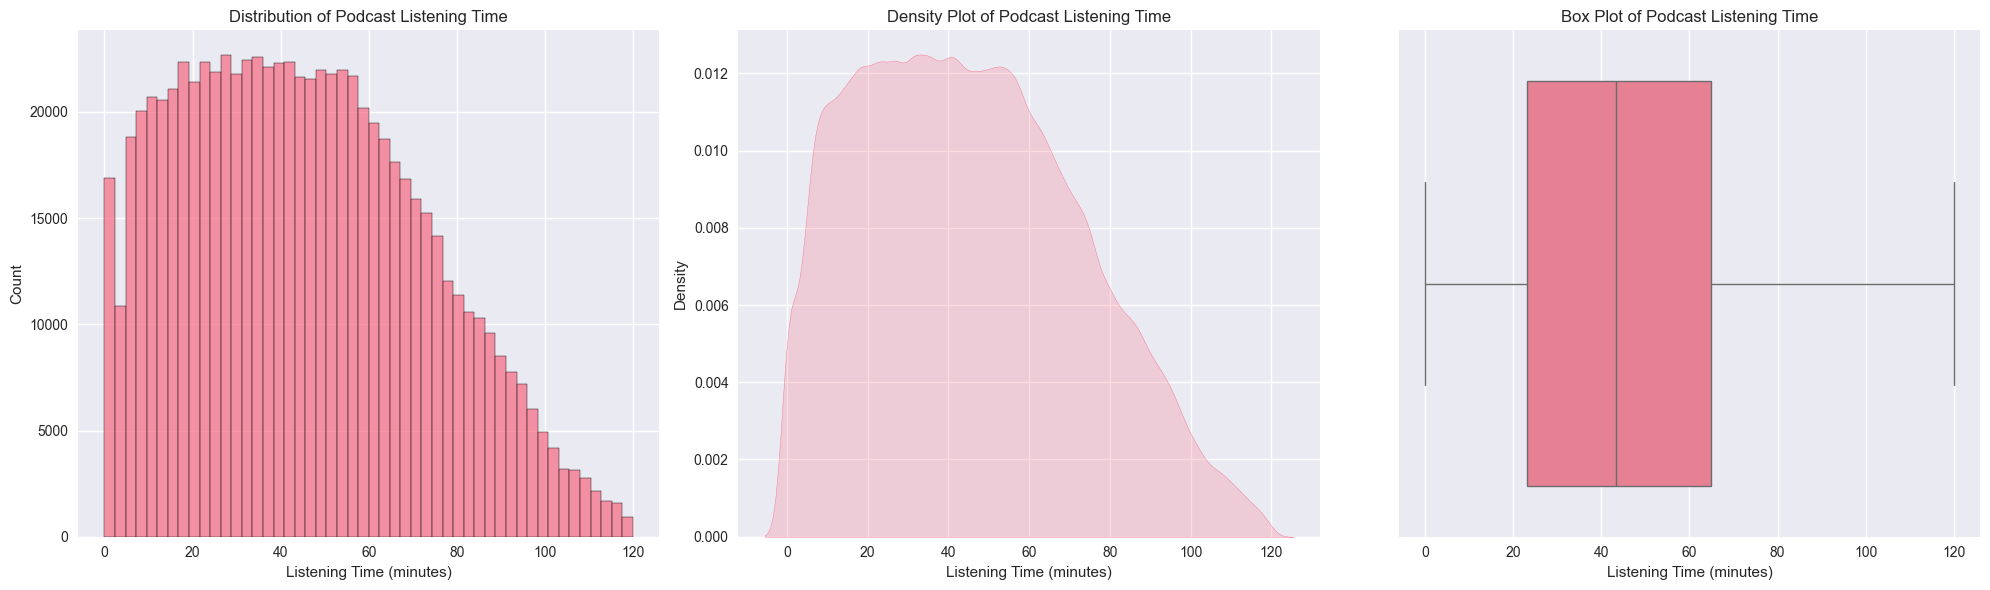


Target variable statistics:


count    750000.000000
mean         45.437406
std          27.138306
min           0.000000
25%          23.178350
50%          43.379460
75%          64.811580
max         119.970000
Name: Listening_Time_minutes, dtype: float64

In [22]:
# Create a figure with 3 subplots in a row
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))

# Distribution plot
sns.histplot(data=train, x='Listening_Time_minutes', bins=50, ax=ax1)
ax1.set_title('Distribution of Podcast Listening Time')
ax1.set_xlabel('Listening Time (minutes)')
ax1.set_ylabel('Count')

# Density plot
sns.kdeplot(train['Listening_Time_minutes'], shade=True, ax=ax2)
ax2.set_title('Density Plot of Podcast Listening Time')
ax2.set_xlabel('Listening Time (minutes)')
ax2.set_ylabel('Density')

# Box plot
sns.boxplot(x='Listening_Time_minutes', data=train, ax=ax3)
ax3.set_title('Box Plot of Podcast Listening Time')
ax3.set_xlabel('Listening Time (minutes)')

plt.tight_layout()
plt.show()


# Basic statistics of the target variable
print("\nTarget variable statistics:")
train['Listening_Time_minutes'].describe()

# For numerical features

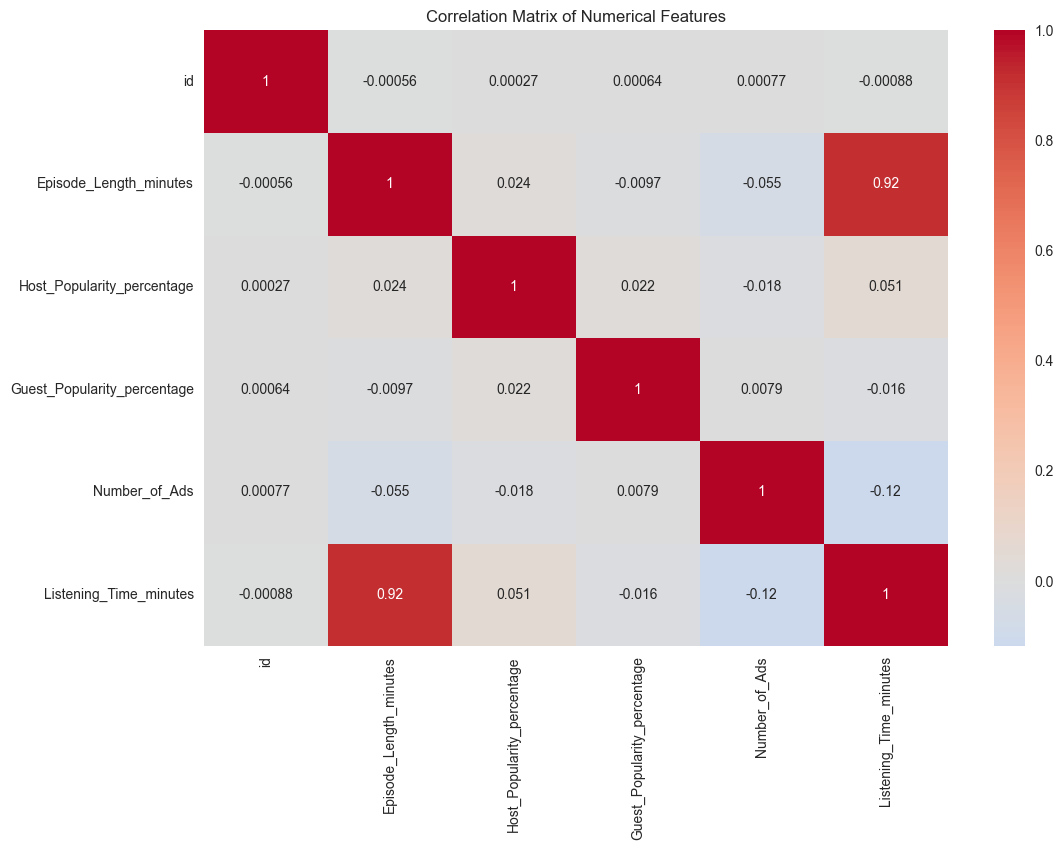

In [23]:
# Correlation analysis
numeric_cols = train.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = train[numeric_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# For categorical features:


=== OLS Regression Results for Podcast_Name ===
                              OLS Regression Results                              
Dep. Variable:     Listening_Time_minutes   R-squared:                       0.003
Model:                                OLS   Adj. R-squared:                  0.003
Method:                     Least Squares   F-statistic:                     42.10
Date:                    sáb, 05 abr 2025   Prob (F-statistic):               0.00
Time:                            00:25:00   Log-Likelihood:            -3.5389e+06
No. Observations:                  750000   AIC:                         7.078e+06
Df Residuals:                      749952   BIC:                         7.078e+06
Df Model:                              47                                         
Covariance Type:                nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------

C:\Users\ricar\AppData\Local\Temp\ipykernel_14760\2596094399.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=plot_data, x=cat_col, y='Listening_Time_minutes',


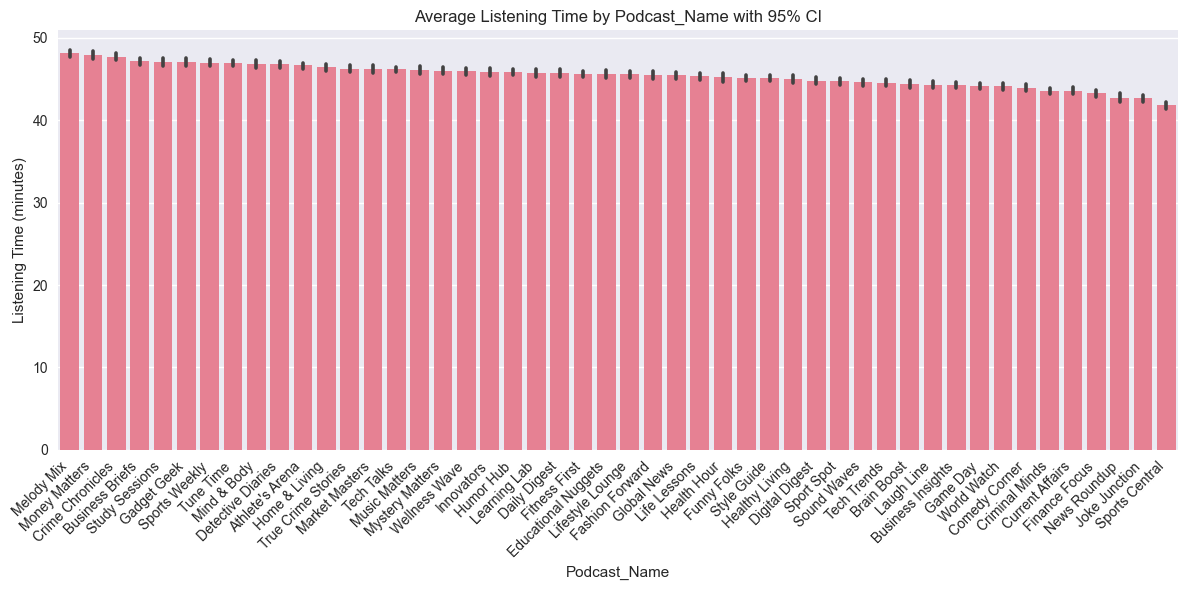


Effect sizes for Podcast_Name:
                                Category  Mean Listening Time  Sample Size  \
Podcast_Name                                                                 
Melody Mix                    Melody Mix                48.11        18889   
Money Matters              Money Matters                47.88        13380   
Crime Chronicles        Crime Chronicles                47.68        17374   
Business Briefs          Business Briefs                47.12        17012   
Study Sessions            Study Sessions                47.05        13053   
Gadget Geek                  Gadget Geek                47.03        14770   
Sports Weekly              Sports Weekly                46.97        20053   
Tune Time                      Tune Time                46.90        17254   
Mind & Body                  Mind & Body                46.84        13639   
Detective Diaries      Detective Diaries                46.76        17452   
Athlete's Arena          Athlete

C:\Users\ricar\AppData\Local\Temp\ipykernel_14760\2596094399.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=plot_data, x=cat_col, y='Listening_Time_minutes',


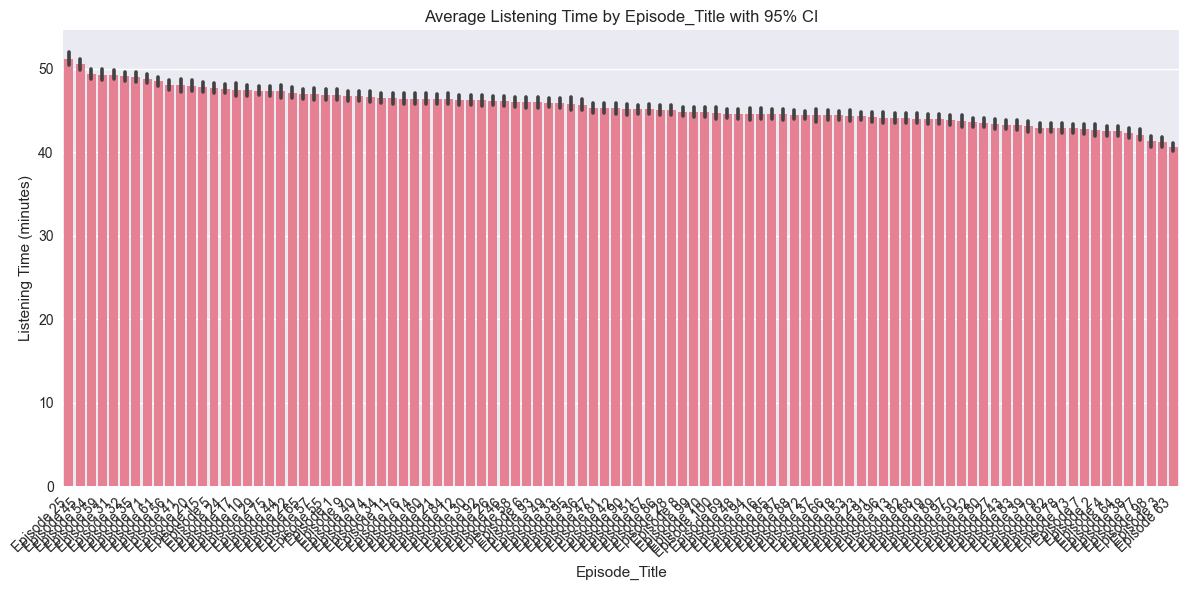


Effect sizes for Episode_Title:
                 Category  Mean Listening Time  Sample Size  \
Episode_Title                                                 
Episode 25     Episode 25                51.22         5117   
Episode 45     Episode 45                50.55         6843   
Episode 54     Episode 54                49.34         8342   
Episode 59     Episode 59                49.31         7338   
Episode 31     Episode 31                49.27        10292   
...                   ...                  ...          ...   
Episode 38     Episode 38                42.37         6909   
Episode 77     Episode 77                42.09         6232   
Episode 98     Episode 98                41.31         5902   
Episode 3       Episode 3                41.23         6943   
Episode 63     Episode 63                40.62         9743   

               Difference from Overall Mean  
Episode_Title                                
Episode 25                             5.78  
Episode 4

C:\Users\ricar\AppData\Local\Temp\ipykernel_14760\2596094399.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=plot_data, x=cat_col, y='Listening_Time_minutes',


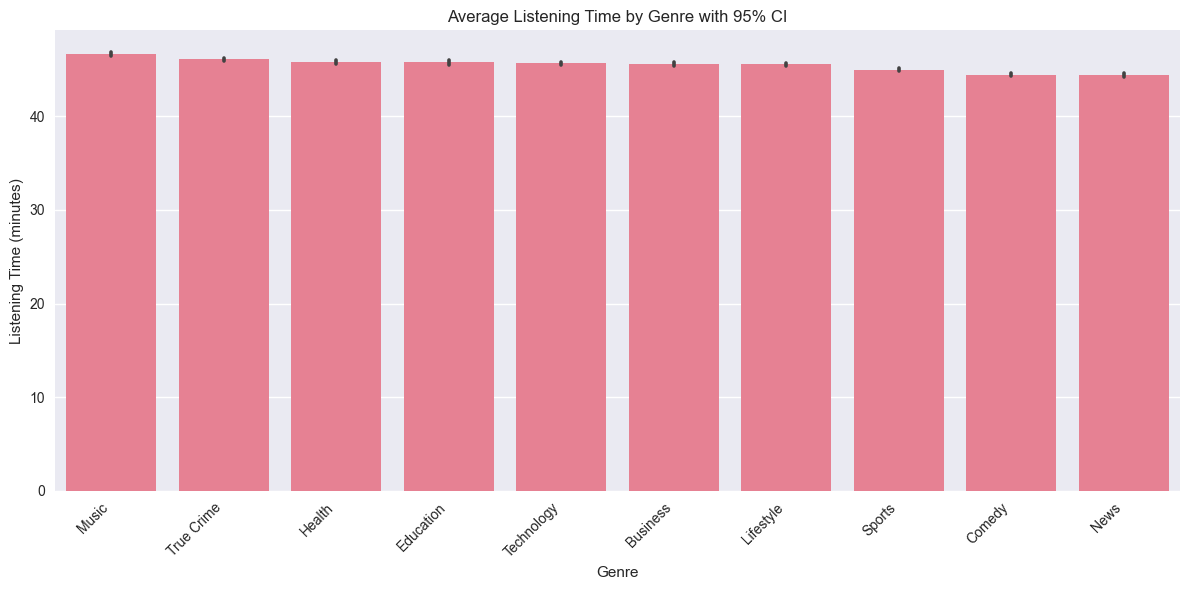


Effect sizes for Genre:
              Category  Mean Listening Time  Sample Size  \
Genre                                                      
Music            Music                46.58        62743   
True Crime  True Crime                46.04        85059   
Health          Health                45.74        71416   
Education    Education                45.74        49100   
Technology  Technology                45.63        86256   
Business      Business                45.54        80521   
Lifestyle    Lifestyle                45.52        82461   
Sports          Sports                44.94        87606   
Comedy          Comedy                44.43        81453   
News              News                44.41        63385   

            Difference from Overall Mean  
Genre                                     
Music                               1.14  
True Crime                          0.61  
Health                              0.30  
Education                           0.3

C:\Users\ricar\AppData\Local\Temp\ipykernel_14760\2596094399.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=plot_data, x=cat_col, y='Listening_Time_minutes',


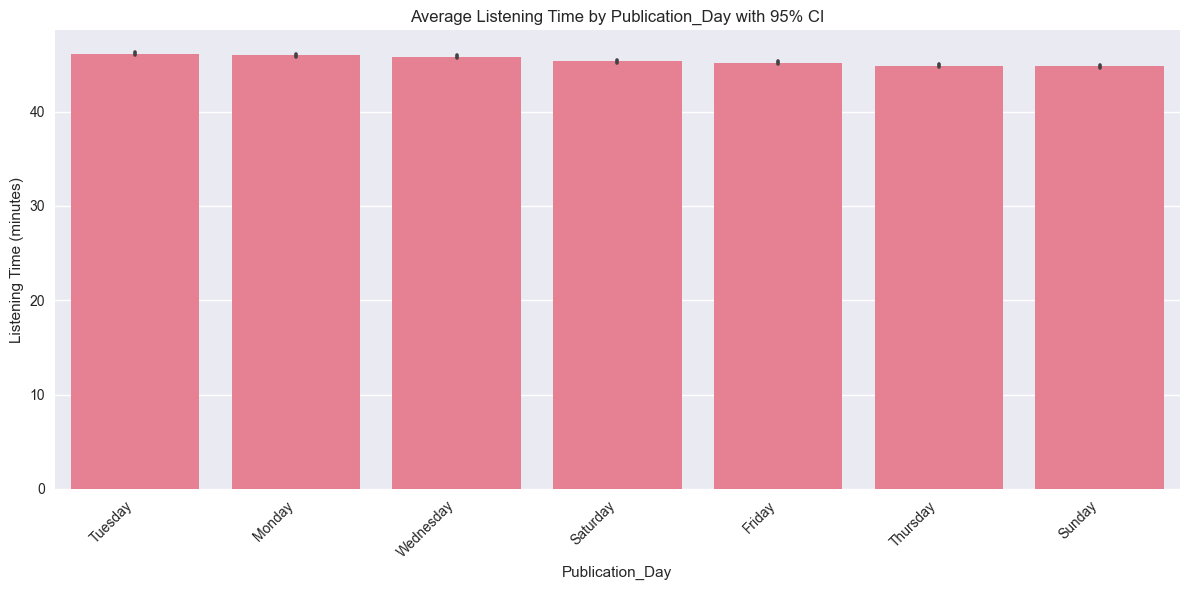


Effect sizes for Publication_Day:
                  Category  Mean Listening Time  Sample Size  \
Publication_Day                                                
Tuesday            Tuesday                46.13        98103   
Monday              Monday                45.97       111963   
Wednesday        Wednesday                45.81       107886   
Saturday          Saturday                45.33       103505   
Friday              Friday                45.21       108237   
Thursday          Thursday                44.87       104360   
Sunday              Sunday                44.82       115946   

                 Difference from Overall Mean  
Publication_Day                                
Tuesday                                  0.69  
Monday                                   0.53  
Wednesday                                0.37  
Saturday                                -0.11  
Friday                                  -0.23  
Thursday                                -0.57  
Sund

C:\Users\ricar\AppData\Local\Temp\ipykernel_14760\2596094399.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=plot_data, x=cat_col, y='Listening_Time_minutes',


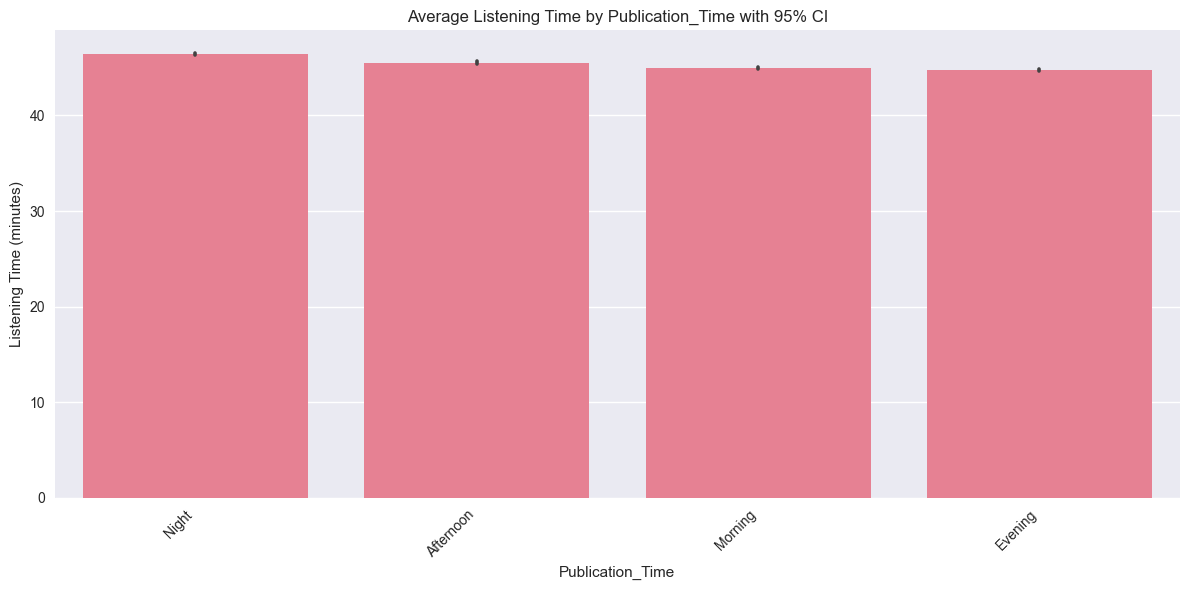


Effect sizes for Publication_Time:
                   Category  Mean Listening Time  Sample Size  \
Publication_Time                                                
Night                 Night                46.46       196849   
Afternoon         Afternoon                45.53       179460   
Morning             Morning                44.96       177913   
Evening             Evening                44.76       195778   

                  Difference from Overall Mean  
Publication_Time                                
Night                                     1.02  
Afternoon                                 0.09  
Morning                                  -0.47  
Evening                                  -0.68  



=== OLS Regression Results for Episode_Sentiment ===
                              OLS Regression Results                              
Dep. Variable:     Listening_Time_minutes   R-squared:                       0.002
Model:                                OLS   Adj. R-square

C:\Users\ricar\AppData\Local\Temp\ipykernel_14760\2596094399.py:40: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=plot_data, x=cat_col, y='Listening_Time_minutes',


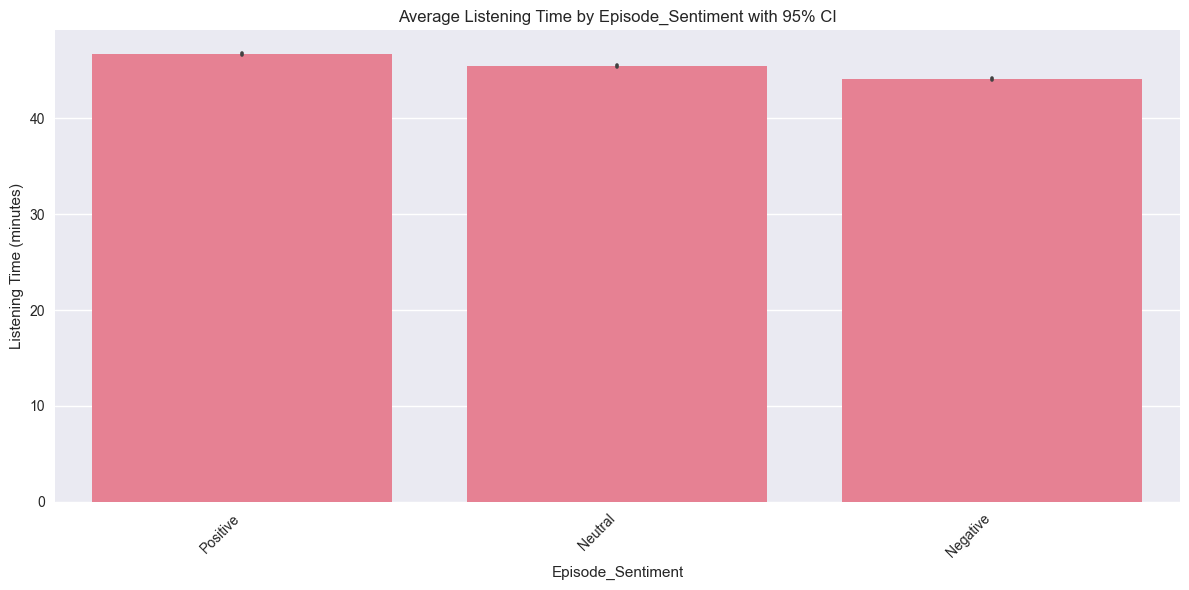


Effect sizes for Episode_Sentiment:
                   Category  Mean Listening Time  Sample Size  \
Episode_Sentiment                                               
Positive           Positive                46.72       248593   
Neutral             Neutral                45.50       251291   
Negative           Negative                44.10       250116   

                   Difference from Overall Mean  
Episode_Sentiment                                
Positive                                   1.29  
Neutral                                    0.06  
Negative                                  -1.34  




In [33]:
# Identify categorical columns
categorical_cols = train.select_dtypes(include=['object', 'category']).columns

# For each categorical feature, analyze its relationship with Listening Time
for cat_col in categorical_cols:
    try:
        # Drop any missing values
        analysis_df = train[[cat_col, 'Listening_Time_minutes']].dropna()
        
        # Create dummy variables - ensure they're numeric
        dummy_vars = pd.get_dummies(analysis_df[cat_col], prefix=cat_col, drop_first=True).astype(float)
        
        # Prepare X (features) and y (target)
        X = dummy_vars
        y = analysis_df['Listening_Time_minutes'].astype(float)
        
        # Add constant for intercept
        X = sm.add_constant(X)
        
        # Fit OLS model
        model = sm.OLS(y, X).fit()
        
        # Print model summary
        print(f"\n=== OLS Regression Results for {cat_col} ===")
        print(model.summary())
        
        # Create visualization
        plt.figure(figsize=(12, 6))
        
        # Calculate mean listening time for each category
        mean_listening_time = analysis_df.groupby(cat_col)['Listening_Time_minutes'].agg(['mean', 'count']).sort_values('mean', ascending=False)
        
        # Only plot categories with sufficient data points (e.g., more than 10)
        significant_categories = mean_listening_time[mean_listening_time['count'] > 10].index
        
        # Filter data for plotting
        plot_data = analysis_df[analysis_df[cat_col].isin(significant_categories)]
        
        # Create bar plot with confidence intervals
        sns.barplot(data=plot_data, x=cat_col, y='Listening_Time_minutes', 
                   order=significant_categories, ci=95)
        
        plt.title(f'Average Listening Time by {cat_col} with 95% CI')
        plt.xticks(rotation=45, ha='right')
        plt.xlabel(cat_col)
        plt.ylabel('Listening Time (minutes)')
        plt.tight_layout()
        plt.show()
        
        # Print effect sizes
        print(f"\nEffect sizes for {cat_col}:")
        effects = pd.DataFrame({
            'Category': mean_listening_time.index,
            'Mean Listening Time': mean_listening_time['mean'],
            'Sample Size': mean_listening_time['count'],
            'Difference from Overall Mean': mean_listening_time['mean'] - analysis_df['Listening_Time_minutes'].mean()
        })
        print(effects.round(2))
        print("\n" + "="*80 + "\n")
        
    except Exception as e:
        print(f"Error processing {cat_col}: {str(e)}")
        continue

# Visualize train density distributions

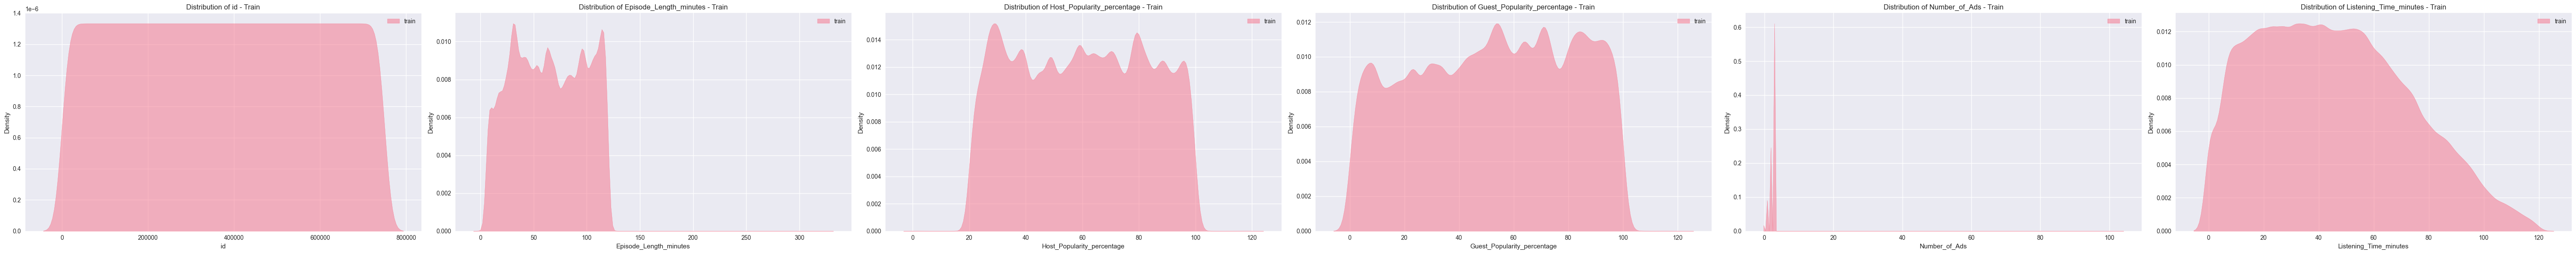

In [38]:
# Identify numerical columns
numerical_cols = train.select_dtypes(include=['int64', 'float64']).columns

# Create a single figure with subplots in one row
fig, axes = plt.subplots(1, len(numerical_cols), figsize=(10*len(numerical_cols), 6))

# Compare distributions of features between train and test
for i, col in enumerate(numerical_cols):
    sns.kdeplot(data=train[col], ax=axes[i], alpha=0.5, label='train', fill=True)
    axes[i].set_title(f'Distribution of {col} - Train')
    axes[i].legend()

plt.tight_layout()
plt.show()

## Exploratory Data Analysis Summary

### 1. Dataset Overview
- The dataset contains 750,000 podcast episodes
- 12 features including both numerical and categorical variables
- Target variable: `Listening_Time_minutes`

### 2. Missing Values
- `Episode_Length_minutes`: 87,093 missing values
- `Guest_Popularity_percentage`: 146,030 missing values
- `Number_of_Ads`: 1 missing value
- Other features have no missing values

### 3. Target Variable Analysis
- Mean listening time: 45.44 minutes
- Standard deviation: 27.14 minutes
- Range: 0 to 119.97 minutes
- Distribution shows some skewness (0.35) and light tails (kurtosis: 2.34)

### 4. Categorical Feature Insights

#### a. Genre Impact
- Music podcasts have highest average listening time (46.58 minutes)
- True Crime follows closely (46.04 minutes)
- News podcasts have lowest average listening time (44.41 minutes)
- Comedy podcasts also have lower listening times (44.43 minutes)

#### b. Publication Day Impact
- Tuesday has highest average listening time (46.13 minutes)
- Sunday has lowest average listening time (44.82 minutes)
- Weekdays generally perform better than weekends

#### c. Publication Time Impact
- Night publications have highest average listening time (46.46 minutes)
- Evening publications have lowest average listening time (44.76 minutes)
- Afternoon and morning times are in between

#### d. Episode Sentiment Impact
- Positive sentiment episodes have highest average listening time (46.72 minutes)
- Negative sentiment episodes have lowest average listening time (44.10 minutes)
- Neutral sentiment is in between (45.50 minutes)

### 5. Numerical Feature Insights
- `Host_Popularity_percentage`: Ranges from 1.3% to 119.46%
- `Guest_Popularity_percentage`: Ranges from 0% to 119.91%
- `Number_of_Ads`: Ranges from 0 to 103.91 ads
- `Episode_Length_minutes`: Ranges from 0 to 325.24 minutes

### 6. Correlation Analysis
- The correlation matrix shows relationships between numerical features
- Some features show moderate correlations with listening time

### 7. Key Findings for Prediction
- Episode sentiment has a significant impact on listening time
- Publication timing (both day and time) affects listening duration
- Genre choice influences listener engagement
- Host and guest popularity metrics are important predictors
- Number of ads may impact listening duration

### Recommendations for Podcast Creators
- Focus on creating positive content
- Consider publishing on weekdays, especially Tuesdays
- Aim for night-time publications
- Choose genres carefully (Music and True Crime perform well)
- Balance ad content to maintain listener engagement
- Consider both host and guest popularity when planning episodes